In [14]:
from keras.applications.xception import Xception
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.xception import preprocess_input, decode_predictions
from keras.applications.vgg16 import preprocess_input, decode_predictions
import numpy as np


import PIL
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt

In [15]:
# load the model
#model = Xception(weights='imagenet', include_top=True)
model = VGG16(weights='imagenet', include_top=True)
model.summary()

553467904/553467096 [==============================] - 5s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
____________________________________________________________

In [20]:
 
 
# chose the URL image that you want
URL = "https://images.unsplash.com/photo-1529429617124-95b109e86bb8?ixlib=rb-1.2.1&amp;ixid=eyJhcHBfaWQiOjEyMDd9&amp;auto=format&amp;fit=crop&amp;w=500&amp;q=60"
 
 
# get the image
response = requests.get(URL)
img = Image.open(BytesIO(response.content))
# resize the image according to each model (see documentation of each model)

#img = img.resize((299,299)) #Xception
img = img.resize((224,224)) #Xception
 
##############################################
# if you want to read the image from your PC 
#############################################
# img_path = 'myimage.jpg'
# img = image.load_img(img_path, target_size=(299, 299))
#############################################
 
 

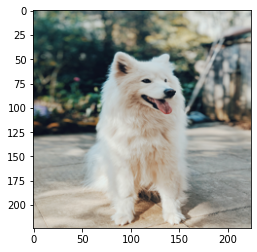

In [21]:
plt.imshow(img)

In [22]:
# convert to numpy array
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
 
output = model.predict(x)
 
# return the top 20 detected objects
label = decode_predictions(output, top=10)
label



[[('n02111889', 'Samoyed', 0.9196825),
  ('n02114548', 'white_wolf', 0.03530937),
  ('n02112018', 'Pomeranian', 0.007639349),
  ('n02111500', 'Great_Pyrenees', 0.005294585),
  ('n02104029', 'kuvasz', 0.0050854683),
  ('n02109961', 'Eskimo_dog', 0.0047332076),
  ('n02098286', 'West_Highland_white_terrier', 0.003530693),
  ('n02112137', 'chow', 0.0022583895),
  ('n02120079', 'Arctic_fox', 0.0022290663),
  ('n02094258', 'Norwich_terrier', 0.0011551734)]]